In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels as sm 
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import os

WE need to structure data first before building neural network

In [55]:
data= pd.read_excel(r"C:\Users\Lenovo\Desktop\ML agribusiness\Homework\homework_2\Data_Oil_Price.xlsx")
data.head()

,Time,Brent_Oil
0,2019-01-02,54.91
1,2019-01-03,55.95
2,2019-01-04,57.06
3,2019-01-07,57.33
4,2019-01-08,58.72


In [56]:
data.info

<bound method DataFrame.info of            Time  Brent_Oil
0    2019-01-02      54.91
1    2019-01-03      55.95
2    2019-01-04      57.06
3    2019-01-07      57.33
4    2019-01-08      58.72
...         ...        ...
1250 2023-11-06      85.18
1251 2023-11-07      81.61
1252 2023-11-08      79.54
1253 2023-11-09      80.01
1254 2023-11-10      81.43

[1255 rows x 2 columns]>

In [57]:
data['Time']=pd.to_datetime(data['Time'])# jsut of our data does not have column name as time or make our data in time format 

In [58]:
# splitting the data into train data and test data for time series 
length_data= len(data)
split_ratio=0.7
length_train=round(length_data*split_ratio)
length_validation=length_data-length_train
print("Data length:",length_data)
print("Train data length:",length_train)
print("Validation data length:",length_validation)


Data length: 1255
Train data length: 878
Validation data length: 377


In [61]:
# extract the var that we need

train_data= data[:length_train].iloc[:,:2]
train_data

,Time,Brent_Oil
0,2019-01-02,54.91
1,2019-01-03,55.95
2,2019-01-04,57.06
3,2019-01-07,57.33
4,2019-01-08,58.72
...,...,...
873,2022-05-23,113.42
874,2022-05-24,113.56
875,2022-05-25,114.03
876,2022-05-26,117.40


In [62]:
# creating the training data site from train split 
dataset_train = train_data.Brent_Oil.values
dataset_train.shape



(878,)

In [63]:
# change 1d array to 2d arra
dataset_train=np.reshape(dataset_train,(-1,1))
dataset_train.shape

#dataset_validation=np.reshape(dataset_validation,(-1,1))
#dataset_validation.shape

(878, 1)

In [64]:
# normalization
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler(feature_range=(0,1))
dataset_train_scaled=scaler.fit_transform(dataset_train)
#dataset_validation_scaled=scaler.fit_transform(dataset_validation) #we coul deal it with later 




<function matplotlib.pyplot.show(close=None, block=None)>

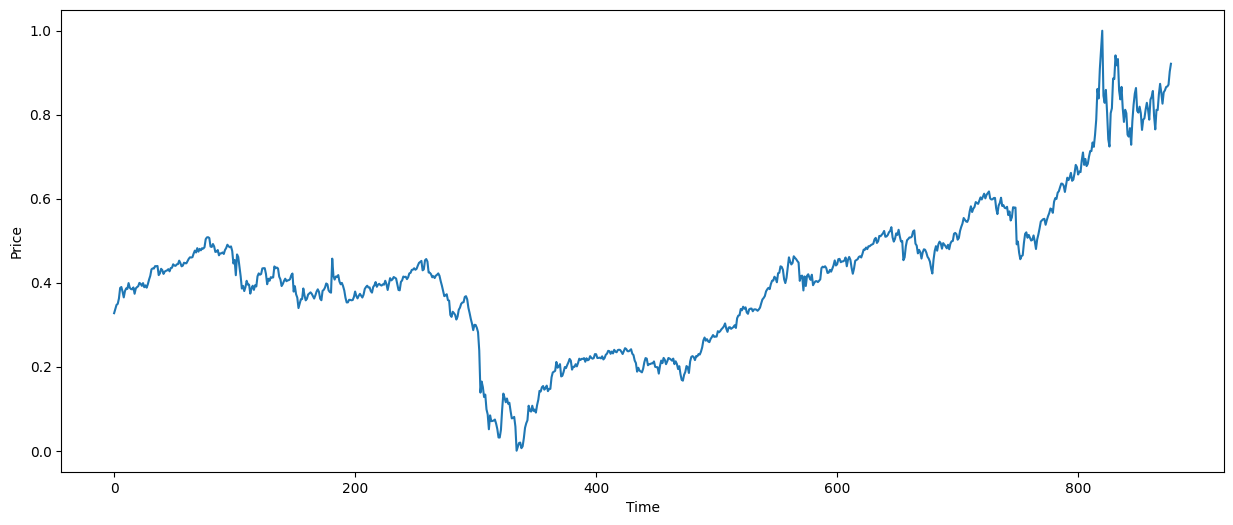

In [65]:
# plot the train data

plt.subplots(figsize=(15,6))
plt.plot(dataset_train_scaled)
plt.xlabel("Time")
plt.ylabel("Price")
plt.show

In [67]:
# creating x_train and y train from train data set

X_train =[]
y_train=[]

time_step=50
for i in range(time_step, length_train):
    X_train.append(dataset_train_scaled[i-time_step:i,0])
    y_train.append(dataset_train_scaled[i,0])
    
    
# convert list to array
X_train, y_train=np.array(X_train),np.array(y_train)

print(X_train.shape)
print(y_train.shape)

(828, 50)
(828,)


In [68]:
# reshape 
x_train=np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))
y_train=np.reshape(y_train,(y_train.shape[0],1))

print(x_train.shape)
print(y_train.shape)

(828, 50, 1)
(828, 1)


In [73]:
import tensorflow as tf 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dropout, Dense

In [77]:
# initial RNN
regressor= Sequential()

# first rnn layers

regressor.add(SimpleRNN(units=50, activation="tanh", return_sequences=True, input_shape=(X_train.shape[1],1)))
regressor.add(Dropout(0.2))

# second layer

regressor.add(SimpleRNN(units=50, activation="tanh", return_sequences=True))
regressor.add(Dropout(0.2))

#  third layer 
regressor.add(SimpleRNN(units=50,activation="tanh", return_sequences=True))
regressor.add(Dropout(0.2))

# fourth layer
regressor.add(SimpleRNN(units=50))
regressor.add(Dropout(0.2))

# output RNN layer#

regressor.add(Dense(units=1))

# compiling the RNN
regressor.compile(optimizer="adam", loss="mean_squared_error",metrics= ["accuracy"])

# fitting the RNN

history= regressor.fit(X_train, y_train, epochs=50, batch_size=32)


Epoch 1/50
26/26 [==============================] - 3s 22ms/step - loss: 0.5087 - accuracy: 0.0024
Epoch 2/50
26/26 [==============================] - 1s 22ms/step - loss: 0.2877 - accuracy: 0.0012
Epoch 3/50
26/26 [==============================] - 1s 22ms/step - loss: 0.2549 - accuracy: 0.0024
Epoch 4/50
26/26 [==============================] - 1s 23ms/step - loss: 0.2091 - accuracy: 0.0024
Epoch 5/50
26/26 [==============================] - 1s 22ms/step - loss: 0.1764 - accuracy: 0.0012
Epoch 6/50
26/26 [==============================] - 1s 23ms/step - loss: 0.1544 - accuracy: 0.0024
Epoch 7/50
26/26 [==============================] - 1s 25ms/step - loss: 0.1401 - accuracy: 0.0012
Epoch 8/50
26/26 [==============================] - 1s 24ms/step - loss: 0.1069 - accuracy: 0.0024
Epoch 9/50
26/26 [==============================] - 1s 23ms/step - loss: 0.0928 - accuracy: 0.0012
Epoch 10/50
26/26 [==============================] - 1s 25ms/step - loss: 0.0812 - accuracy: 0.0012
Epoch 11/

<function matplotlib.pyplot.show(close=None, block=None)>

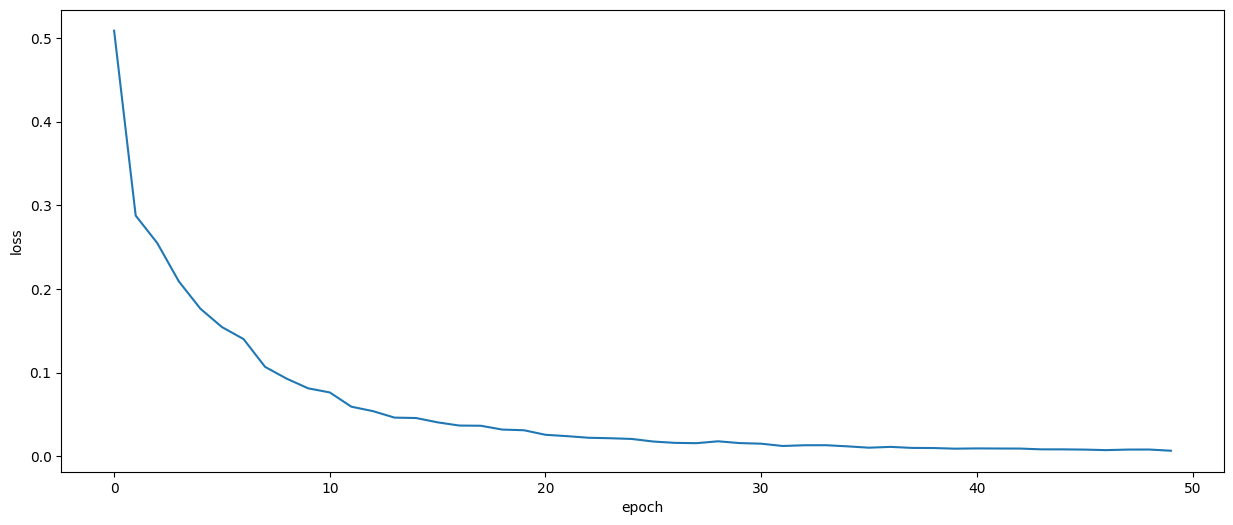

In [84]:
# plotting loss vs epoch 
plt.subplots(figsize=(15,6))
plt.plot(history.history["loss"])
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show

 1/26 [>.............................] - ETA: 0s

26/26 [==============================] - 0s 9ms/step


<function matplotlib.pyplot.show(close=None, block=None)>

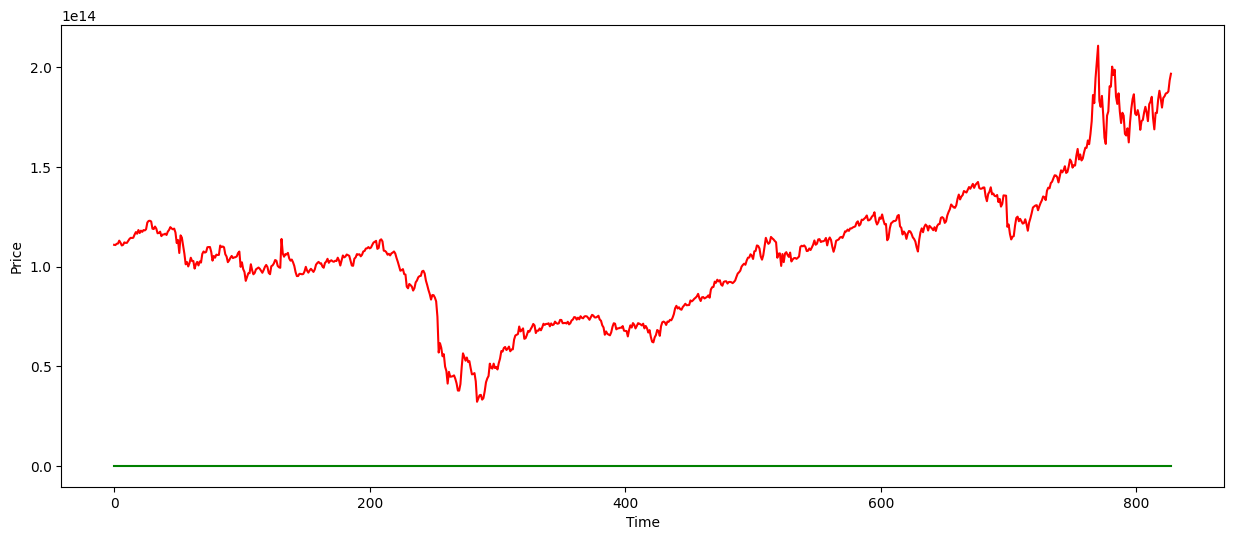

In [87]:
# now we can use our trained model for further prediction of trained data 
y_pred = regressor.predict(X_train)
y_pred = scaler.inverse_transform(y_pred)# becaused we sclaed y in train 
y_train= scaler.inverse_transform(y_train)

plt.subplots(figsize=(15,6))
plt.plot(y_pred, color="g", label="y_pred_RNN")
plt.plot(y_train, color="r", label="y_real")
plt.xlabel("Time")
plt.ylabel("Price")
plt.show

In [ ]:
# for validation now

train_data= data[:length_train].iloc[:,:2]
train_data